In [1]:
%load_ext autoreload
%autoreload 2
import os
import glob
import json

outs = {}


for filename in sorted([f for f in glob.glob("../output/*.json") if "test" not in f]): 
    model_name = os.path.basename(filename).split(".")[0]
    print(model_name)
    with open(filename) as f:
        outs[model_name] = json.load(f)

bertin
beto-cased-10000
beto-cased-20000
beto-cased-2500
beto-cased-5000
beto-cased
beto-uncased-10000
beto-uncased-20000
beto-uncased-2500
beto-uncased-5000
beto-uncased
roberta-bne
robertuito-cased
robertuito-deacc
robertuito-uncased-200k
robertuito-uncased


## Barplots

In [59]:
models = [
    "beto-uncased", "beto-uncased-2500", "beto-uncased-5000", "beto-uncased-10000", "beto-uncased-20000",
    "beto-cased", ""
]
task_metrics = {
    "context_hate": ["eval_mean_f1"],
    "hate": ["eval_macro_f1"],
    "sentiment": ["eval_macro_f1"],
    "emotion": ["eval_macro_f1"],
    "irony": ["eval_macro_f1"],
}

for model in 
for task in task_metrics:
    task_df = pd.DataFrame()
    for metric in task_metrics[task]:
        

In [55]:
melted_df = df.melt(id_vars=["model", "case"], var_name="task", value_name="score")

melted_df

,model,case,task,score
0,beto-cased,cased,context_hate,0.582463
1,beto-cased,cased,context_hate,0.591472
2,beto-cased,cased,context_hate,0.576967
3,beto-cased,cased,context_hate,0.582129
4,beto-cased,cased,context_hate,0.584909
...,...,...,...,...
445,beto-uncased-20000,uncased,irony,0.708376
446,beto-uncased-20000,uncased,irony,0.700625
447,beto-uncased-20000,uncased,irony,0.706693
448,beto-uncased-20000,uncased,irony,0.710184


In [4]:
df.melt(id_vars=["model"])

,model,variable,value
0,beto-cased-2500,context_hate,0.582009
1,beto-cased-2500,context_hate,0.584450
2,beto-cased-2500,context_hate,0.571173
3,beto-cased-2500,context_hate,0.581049
4,beto-cased-2500,context_hate,0.586048
...,...,...,...
395,beto-uncased-20000,irony,0.708376
396,beto-uncased-20000,irony,0.700625
397,beto-uncased-20000,irony,0.706693
398,beto-uncased-20000,irony,0.710184


KeyError: 'variable'

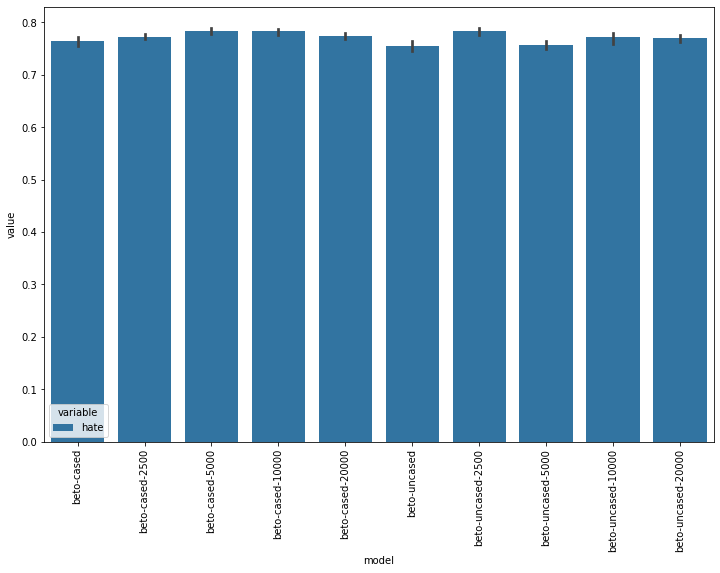

In [31]:
import pandas as pd
import numpy as np

resume = []
mean_resume = []
task_metrics = {
    "context_hate": ["eval_mean_f1", "eval_hate_f1"],
    "hate": ["eval_hateful_f1", "eval_macro_f1"],
    "sentiment": ["eval_macro_f1", "eval_micro_f1"],
    "emotion": ["eval_macro_f1", "eval_micro_f1"],
    "irony": ["eval_ironic_f1", "eval_macro_f1"],
}

    
for model_name, output in outs.items():
    line = {
        "model": model_name, 
    }

    mean_line = {
        "model": model_name,
    }

    for task, metrics in task_metrics.items():
        try:
            for metric in metrics:
                arr = np.array([evaluation[metric] for evaluation in output[task]])
                metric_name = metric.replace("eval_", "")
                mean_line[task+" "+metric_name] = arr.mean()
                line[task+" "+metric_name] = f"{arr.mean():.3f} +- {arr.std():.3f}"
        except KeyError as e:
            print(e, "not in ", model_name)
            continue
    resume.append(line)
    mean_resume.append(mean_line)

order = [
    "bertin",
    "roberta-bne",
    "beto-uncased",
    # Nos quedamos con uncased-10000 que es el mejor
    #"beto-uncased-2500",
    #"beto-uncased-5000",
    "beto-uncased-10000",
    #"beto-uncased-20000",
    "robertuito-uncased",
    #"robertuito-deacc-288k",
    #"robertuito-deacc-344k",
    #"robertuito-deacc-400k",
    #"robertuito-deacc-440k",
    #"robertuito-deacc-490k",
    #"robertuito-deacc-510k",
    #"robertuito-deacc-540k",
    #"robertuito-deacc-576k",
    #"robertuito-deacc-592k",
    "robertuito-deacc",
    #"checkpoint-46k",
    #"checkpoint-62k",
    #"checkpoint-87k",
    #"checkpoint-100k",
    #"checkpoint-124k",
    #"robertuito-uncased-200k",
    "beto-cased",
    #"beto-cased-2500",
    "beto-cased-5000",
    #"beto-cased-10000",
    #"beto-cased-20000",
    "robertuito-cased",
]


df = pd.DataFrame(resume)
df.set_index("model", inplace=True)

df_mean = pd.DataFrame(mean_resume).set_index("model")
score_cols = ["context_hate mean_f1", "hate macro_f1", "sentiment macro_f1", "emotion macro_f1", "irony macro_f1"]
score_without_chate_cols = ["hate macro_f1", "sentiment macro_f1", "emotion macro_f1", "irony macro_f1"]

df.loc[order, "score"] = df_mean.loc[order, score_cols].mean(axis=1)
df.loc[order, "score2"] = df_mean.loc[order, score_without_chate_cols].mean(axis=1)
columns = [c for c in df.columns if "micro" not in c and "score" not in c] + ["score", "score2" ]

df.loc[order, score_cols + ["score", "score2"]].sort_values("score")

,context_hate mean_f1,hate macro_f1,sentiment macro_f1,emotion macro_f1,irony macro_f1,score,score2
model,,,,,,,
beto-uncased,0.590 +- 0.006,0.756 +- 0.011,0.648 +- 0.005,0.520 +- 0.006,0.703 +- 0.007,0.643285,0.656722
bertin,0.558 +- 0.008,0.766 +- 0.005,0.664 +- 0.003,0.517 +- 0.011,0.715 +- 0.008,0.644139,0.665697
beto-cased,0.584 +- 0.005,0.765 +- 0.010,0.665 +- 0.003,0.526 +- 0.008,0.707 +- 0.007,0.649226,0.665636
roberta-bne,0.578 +- 0.004,0.767 +- 0.015,0.667 +- 0.007,0.535 +- 0.012,0.723 +- 0.016,0.654161,0.673217
beto-cased-5000,0.576 +- 0.002,0.783 +- 0.010,0.677 +- 0.004,0.524 +- 0.015,0.723 +- 0.008,0.656472,0.676619
beto-uncased-10000,0.589 +- 0.003,0.772 +- 0.017,0.680 +- 0.004,0.553 +- 0.008,0.716 +- 0.006,0.661718,0.679986
robertuito-cased,0.590 +- 0.005,0.789 +- 0.014,0.700 +- 0.012,0.521 +- 0.032,0.722 +- 0.021,0.664466,0.683070
robertuito-deacc,0.594 +- 0.006,0.800 +- 0.008,0.702 +- 0.004,0.545 +- 0.013,0.739 +- 0.005,0.675947,0.696315
robertuito-uncased,0.592 +- 0.005,0.800 +- 0.008,0.707 +- 0.005,0.546 +- 0.011,0.737 +- 0.009,0.676655,0.697717


In [7]:
print(df.loc[order, score_cols + ["score"]].sort_values("score").to_latex())

\begin{tabular}{llllllr}
\toprule
{} & context\_hate mean\_f1 &   hate macro\_f1 & sentiment macro\_f1 & emotion macro\_f1 &  irony macro\_f1 &     score \\
model              &                      &                 &                    &                  &                 &           \\
\midrule
beto-uncased       &       0.590 +- 0.006 &  0.756 +- 0.011 &     0.648 +- 0.005 &   0.520 +- 0.006 &  0.703 +- 0.007 &  0.643285 \\
bertin             &       0.558 +- 0.008 &  0.766 +- 0.005 &     0.664 +- 0.003 &   0.517 +- 0.011 &  0.715 +- 0.008 &  0.644139 \\
beto-cased         &       0.584 +- 0.005 &  0.765 +- 0.010 &     0.665 +- 0.003 &   0.526 +- 0.008 &  0.707 +- 0.007 &  0.649226 \\
roberta-bne        &       0.578 +- 0.004 &  0.767 +- 0.015 &     0.667 +- 0.007 &   0.535 +- 0.012 &  0.723 +- 0.016 &  0.654161 \\
beto-cased-5000    &       0.576 +- 0.002 &  0.783 +- 0.010 &     0.677 +- 0.004 &   0.524 +- 0.015 &  0.723 +- 0.008 &  0.656472 \\
beto-uncased-10000 &       0.589 +- 

In [5]:
import pandas as pd
import numpy as np

resume = []
mean_resume = []
task_metrics = {
    "context_hate": ["eval_mean_f1", "eval_hate_f1"],
    "hate": ["eval_hateful_f1", "eval_macro_f1"],
    "sentiment": ["eval_macro_f1", "eval_micro_f1"],
    "emotion": ["eval_macro_f1", "eval_micro_f1"],
}

    
for model_name, output in outs.items():
    line = {
        "model": model_name, 
    }

    mean_line = {
        "model": model_name,
    }

    for task, metrics in task_metrics.items():
        try:
            for metric in metrics:
                arr = np.array([evaluation[metric] for evaluation in output[task]])
                metric_name = metric.replace("eval_", "")
                mean_line[task+" "+metric_name] = arr.mean()
                line[task+" "+metric_name] = f"{arr.mean():.4f} +- {arr.std():.3f}"
        except KeyError as e:
            print(e, "not in ", model_name)
            continue
    resume.append(line)
    mean_resume.append(mean_line)

order = [
    "bertin",
    "beto-cased",
    "beto-uncased",
    "beto-ft-1000",
    "beto-ft-2000",
    "beto-uncased-1000",
    "beto-uncased-2000",
    "beto-uncased-5000",
    "beto-uncased-5000-grito",
    "beto-uncased-4000-tpu",
    "beto-uncased-5000-tpu",
    "beto-uncased-15000",
    "beto-uncased-15000-last",
    "beto-cased-15000",
]


df = pd.DataFrame(resume)
df.set_index("model", inplace=True)

df_mean = pd.DataFrame(mean_resume).set_index("model")
score_cols = ["context_hate mean_f1", "hate hateful_f1", "sentiment macro_f1", "emotion macro_f1"]

df.loc[order, "score"] = df_mean.loc[order, score_cols].mean(axis=1)
columns = [c for c in df.columns if "micro" not in c]

df.loc[order, columns]

,context_hate mean_f1,context_hate hate_f1,hate hateful_f1,hate macro_f1,sentiment macro_f1,emotion macro_f1,score
model,,,,,,,
bertin,0.5443 +- 0.005,0.6613 +- 0.009,0.7270 +- 0.013,0.7539 +- 0.013,0.6650 +- 0.002,0.5245 +- 0.026,0.615193
beto-cased,0.5870 +- 0.007,0.6884 +- 0.005,0.7408 +- 0.013,0.7554 +- 0.021,0.6617 +- 0.005,0.5246 +- 0.016,0.628539
beto-uncased,0.5906 +- 0.004,0.6856 +- 0.006,0.7305 +- 0.006,0.7455 +- 0.014,0.6517 +- 0.002,0.5250 +- 0.014,0.624442
beto-ft-1000,0.5857 +- 0.003,0.6861 +- 0.002,0.7552 +- 0.011,0.7786 +- 0.012,0.6721 +- 0.001,0.5335 +- 0.012,0.636610
beto-ft-2000,0.5848 +- 0.005,0.6865 +- 0.003,0.7486 +- 0.003,0.7691 +- 0.010,0.6751 +- 0.005,0.5257 +- 0.010,0.633550
beto-uncased-1000,0.5950 +- 0.003,0.6934 +- 0.002,0.7451 +- 0.004,0.7703 +- 0.004,0.6717 +- 0.005,0.5364 +- 0.009,0.637067
beto-uncased-2000,0.5989 +- 0.004,0.6954 +- 0.002,0.7575 +- 0.009,0.7729 +- 0.015,0.6812 +- 0.001,0.5354 +- 0.005,0.643223
beto-uncased-5000,0.5788 +- 0.001,0.6775 +- 0.004,0.7623 +- 0.002,0.7854 +- 0.000,0.6748 +- 0.004,0.5399 +- 0.006,0.638945
beto-uncased-5000-grito,0.5848 +- 0.008,0.6866 +- 0.009,0.7615 +- 0.006,0.7738 +- 0.010,0.6865 +- 0.005,0.5522 +- 0.003,0.646247


- "last" es usando los mismos parámetros que en el paper de finetuning

No parecen ser los mejores!
